In [1]:
import numpy as np 
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 1/ Training data :

column_names = ['Model_name', 'input_shape', 'ACET', 'input_width', 'input_size', 'model_size', 'nb_params_no_fc', 
                'nb_params_fc', 'flops', 'nb_layers', 'nb_conv_layers', 'nb_fc_layers', 
                'sum_activations', 'weighted_sum_neurones']
raw_dataset = pd.read_csv('./training_dataset.csv', names=column_names,
                      na_values = "?", comment='\t', sep=",", skipinitialspace=True)
train_dataset = raw_dataset.copy()
train_dataset.isna().sum()
train_dataset = train_dataset.dropna()
train_dataset.tail()

,Model_name,input_shape,ACET,input_width,input_size,model_size,nb_params_no_fc,nb_params_fc,flops,nb_layers,nb_conv_layers,nb_fc_layers,sum_activations,weighted_sum_neurones
1521,DPN-137,"(1, 480, 480, 3)",236.347517,480,691200,319.7,76725504,2688000,147429883398,4072,1811,1,761714152,74962944000
1522,DPN-137,"(1, 568, 568, 3)",306.702618,568,967872,319.7,76725504,2688000,210363824006,4072,1811,1,1079996072,107007131648
1523,DPN-137,"(1, 600, 600, 3)",331.850612,600,1080000,319.7,76725504,2688000,234455319558,4072,1811,1,1204310184,119281811456
1524,DPN-137,"(1, 800, 800, 3)",520.859203,800,1920000,319.7,76725504,2688000,408964654598,4072,1811,1,2115851752,208230400000
1525,DPN-137,"(1, 896, 896, 3)",650.251626,896,2408448,319.7,76725504,2688000,512924726150,4072,1811,1,2654121448,261204213760


In [33]:
# 1/ Test data :

column_names = ['Model_name', 'input_shape', 'ACET', 'input_width', 'input_size', 'model_size', 'nb_params_no_fc', 
                'nb_params_fc', 'flops', 'nb_layers', 'nb_conv_layers', 'nb_fc_layers', 
                'sum_activations', 'weighted_sum_neurones']
raw_dataset = pd.read_csv('./test_dim3.csv', names=column_names,
                      na_values = "?", comment='\t', sep=",", skipinitialspace=True)
test_dataset = raw_dataset.copy()
test_dataset.isna().sum()
test_dataset = test_dataset.dropna()
test_dataset.tail()

,Model_name,input_shape,ACET,input_width,input_size,model_size,nb_params_no_fc,nb_params_fc,flops,nb_layers,nb_conv_layers,nb_fc_layers,sum_activations,weighted_sum_neurones
19,NASNet-Mobile,"(1, 331, 331, 3)",16.397280,331,328683,22.2,4269716,1057000,2629916665,771,196,1,62189815,9731133896
20,NASNet-Large,"(1, 64, 64, 3)",49.317171,64,12288,357.0,84916818,4033000,1868148675,1041,268,1,10813366,6709743072
21,NASNet-Large,"(1, 128, 128, 3)",53.963382,128,49152,357.0,84916818,4033000,6917229891,1041,268,1,42382774,26839800288
22,NASNet-Large,"(1, 256, 256, 3)",80.010125,256,196608,357.0,84916818,4033000,27115250499,1041,268,1,168061366,107360877024
23,NASNet-Large,"(1, 331, 331, 3)",110.658881,331,328683,357.0,84916818,4033000,47876527473,1041,268,1,290560171,191031310656


In [4]:
train_dataset.pop('input_width')
train_dataset.pop('model_size')

0         1.9
1         1.9
2         1.9
3         1.9
4         1.9
        ...  
1521    319.7
1522    319.7
1523    319.7
1524    319.7
1525    319.7
Name: model_size, Length: 1526, dtype: float64

In [34]:
test_dataset.pop('input_width')
test_dataset.pop('model_size')

0       5.0
1       5.0
2       5.0
3       5.0
4       5.0
5       5.0
6       5.0
7       5.0
8       5.0
9       5.0
10      5.0
11    276.6
12    679.3
13    197.2
14    297.9
15    700.5
16     22.2
17     22.2
18     22.2
19     22.2
20    357.0
21    357.0
22    357.0
23    357.0
Name: model_size, dtype: float64

In [6]:
y_train = train_dataset.pop('ACET')
X_train = train_dataset
X_train.tail()

,Model_name,input_shape,input_size,nb_params_no_fc,nb_params_fc,flops,nb_layers,nb_conv_layers,nb_fc_layers,sum_activations,weighted_sum_neurones
1521,DPN-137,"(1, 480, 480, 3)",691200,76725504,2688000,147429883398,4072,1811,1,761714152,74962944000
1522,DPN-137,"(1, 568, 568, 3)",967872,76725504,2688000,210363824006,4072,1811,1,1079996072,107007131648
1523,DPN-137,"(1, 600, 600, 3)",1080000,76725504,2688000,234455319558,4072,1811,1,1204310184,119281811456
1524,DPN-137,"(1, 800, 800, 3)",1920000,76725504,2688000,408964654598,4072,1811,1,2115851752,208230400000
1525,DPN-137,"(1, 896, 896, 3)",2408448,76725504,2688000,512924726150,4072,1811,1,2654121448,261204213760


In [35]:
y_test = test_dataset.pop('ACET')
X_test = test_dataset
X_test.tail()

,Model_name,input_shape,input_size,nb_params_no_fc,nb_params_fc,flops,nb_layers,nb_conv_layers,nb_fc_layers,sum_activations,weighted_sum_neurones
19,NASNet-Mobile,"(1, 331, 331, 3)",328683,4269716,1057000,2629916665,771,196,1,62189815,9731133896
20,NASNet-Large,"(1, 64, 64, 3)",12288,84916818,4033000,1868148675,1041,268,1,10813366,6709743072
21,NASNet-Large,"(1, 128, 128, 3)",49152,84916818,4033000,6917229891,1041,268,1,42382774,26839800288
22,NASNet-Large,"(1, 256, 256, 3)",196608,84916818,4033000,27115250499,1041,268,1,168061366,107360877024
23,NASNet-Large,"(1, 331, 331, 3)",328683,84916818,4033000,47876527473,1041,268,1,290560171,191031310656


In [8]:
X_train_model_names = X_train.pop('Model_name')
X_train_input_shapes = X_train.pop('input_shape')

In [36]:
X_test_model_names = X_test.pop('Model_name')
X_test_input_shapes = X_test.pop('input_shape')

In [10]:
steps = [('scaler', StandardScaler()), ('RFR', RandomForestRegressor())]
pipeline = Pipeline(steps)

In [11]:
param_grid = [
        {'RFR__bootstrap': [True],
         'RFR__n_estimators': [1000],
         'RFR__max_features': [0.85],
         'RFR__min_samples_leaf': [10],
         'RFR__min_samples_split': [4]
        },
    ]

In [12]:
grid = GridSearchCV(pipeline, param_grid=param_grid, cv=2)

In [13]:
grid.fit(X_train, y_train)

GridSearchCV(cv=2, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('RFR',
                                        RandomForestRegressor(bootstrap=True,
                                                              ccp_alpha=0.0,
                                                              criterion='mse',
                                                              max_depth=None,
                                                              max_features='auto',
                                                              max_leaf_nodes=None,
                                                              max_samples=None,
                                                       

In [14]:
print("score = %3.2f" %(grid.score(X_test,y_test)))
print(grid.best_params_)

score = 0.99
{'RFR__bootstrap': True, 'RFR__max_features': 0.85, 'RFR__min_samples_leaf': 10, 'RFR__min_samples_split': 4, 'RFR__n_estimators': 1000}


In [15]:
best_pipe = grid.best_estimator_
best_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('RFR',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features=0.85, max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=10, min_samples_split=4,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=1000, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False))],
         verbose=False)

In [16]:
feature_list = ['input_size', 'nb_params_no_fc', 
                'nb_params_fc', 'flops', 'nb_layers', 'nb_conv_layers', 'nb_fc_layers', 
                'sum_activations', 'weighted_sum_neurones']
# Get numerical feature importances
importances = list(best_pipe[1].feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: sum_activations      Importance: 0.56
Variable: flops                Importance: 0.41
Variable: weighted_sum_neurones Importance: 0.03
Variable: input_size           Importance: 0.0
Variable: nb_params_no_fc      Importance: 0.0
Variable: nb_params_fc         Importance: 0.0
Variable: nb_layers            Importance: 0.0
Variable: nb_conv_layers       Importance: 0.0
Variable: nb_fc_layers         Importance: 0.0


In [37]:
predictions = best_pipe.predict(X_test)

In [38]:
# Model evaluation
y_pred = predictions
print('Explained variance : ',explained_variance_score(y_test, y_pred))
print('R2_value : ',r2_score(y_test, y_pred))
print('Mean absolute error :', mean_absolute_error(y_test, y_pred))
print('Median absolute error :', median_absolute_error(y_test, y_pred))

Explained variance :  0.9222196337402273
R2_value :  0.9219600625248277
Mean absolute error : 4.875244408332631
Median absolute error : 2.6184324029554578


In [39]:
# Calculate mean absolute percentage error (MAPE)
np_test = y_test.values
errors = abs(y_pred-np_test)
mape = 100 * (errors / np_test) # Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 72.37 %.


In [40]:
np_test = y_test.values
test_models = X_test_model_names.values
test_input_shapes = X_test_input_shapes.values
for i in range(0, len(y_pred)) :
    print(test_models[i], test_input_shapes[i], y_pred[i], np_test[i], 100-((abs(y_pred[i]-np_test[i]))/np_test[i])*100)

SqueezeNet-v1.1 (1, 90, 90, 3) 1.053860980211448 0.98912147 93.45484733928097
SqueezeNet-v1.1 (1, 512, 512, 3) 8.13431593672834 5.2278544 44.40431361806212
SqueezeNet-v1.1 (1, 720, 720, 3) 14.318606016272208 9.7607754 53.304625611278716
SqueezeNet-v1.1 (64, 64, 3) 1.0277937453630093 0.9090424587155959 86.93666225280616
SqueezeNet-v1.1 (128, 128, 3) 1.4051965736144727 1.15266463302752 78.09146447708147
SqueezeNet-v1.1 (224, 224, 3) 2.6114037226489626 1.85750548623853 59.413404590417386
SqueezeNet-v1.1 (240, 240, 3) 2.7197865953189253 1.91482706422018 57.96176343336948
SqueezeNet-v1.1 (256, 256, 3) 2.8587967539453905 1.9958535321100899 56.76319890453257
SqueezeNet-v1.1 (299, 299, 3) 3.327042905295103 2.75664246788991 79.30814590396231
SqueezeNet-v1.1 (448, 448, 3) 6.484795146696215 4.373639853211009 51.73001517408316
SqueezeNet-v1.1 (1024, 1024, 3) 26.408604647798626 17.705117018348602 50.84196495041399
VGG-16 (1, 128, 128, 3) 20.890919825781268 15.53275248 65.5040704943927
VGG-16 (1, 25

In [41]:
import csv
with open('./evaluation_results/measured_vs_predicted_RFR_dim3.csv', 'a', newline='') as file : 
    writer = csv.writer(file)
    for i in range(0, len(y_pred)) :
        writer.writerow([test_models[i], test_input_shapes[i], np_test[i], y_pred[i],abs(y_pred[i]-np_test[i]), 100-((abs(y_pred[i]-np_test[i]))/np_test[i])*100])

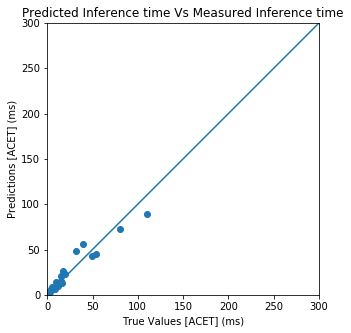

In [42]:
plt.figure(figsize=(10,5))
a = plt.axes(aspect='equal')
plt.scatter(np_test, y_pred)
plt.title('Predicted Inference time Vs Measured Inference time')
plt.xlabel('True Values [ACET] (ms)')
plt.ylabel('Predictions [ACET] (ms)')
lims = [0, 300]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
plt.savefig('./evaluation_results/measured_vs_predicted_RFR_dim3.png', dpi=600)